In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print("Dataset loaded successfully!")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Dataset loaded successfully!


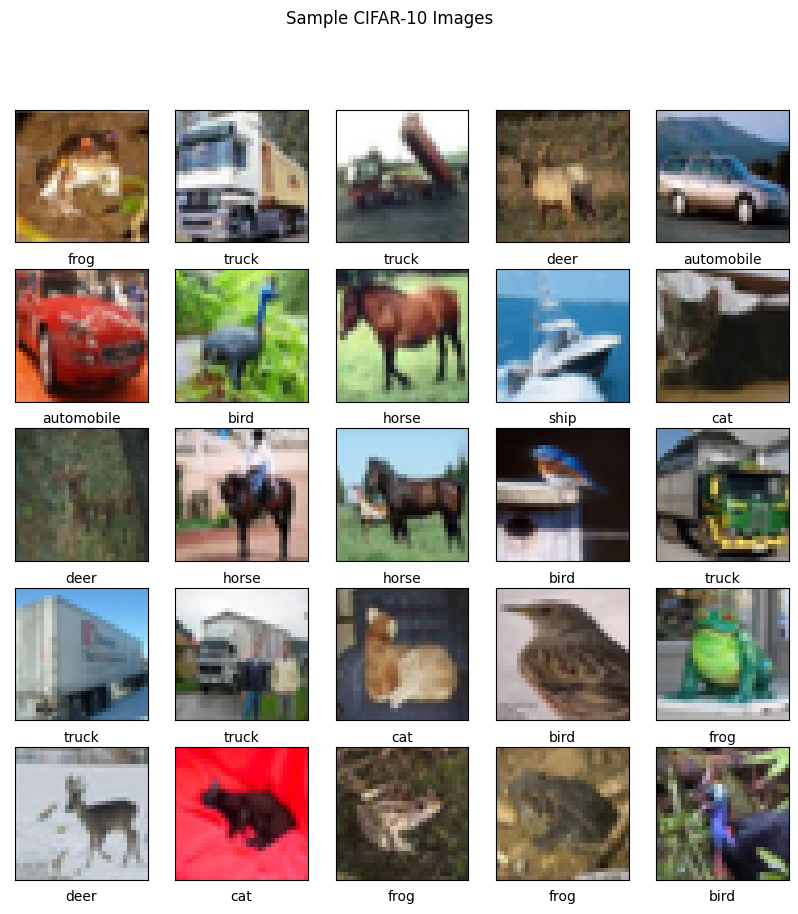

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The labels are arrays, so we need to access the first element
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

Pixel values normalized (divided by 255).


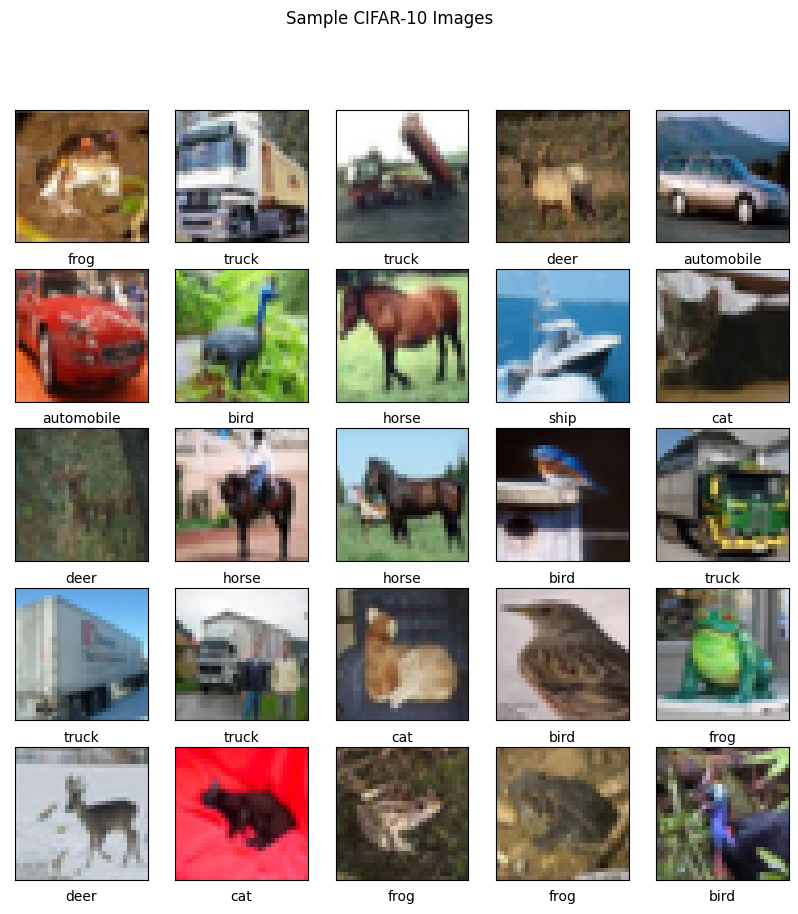

Class labels converted to one-hot encoded format.
One-hot encoded training labels shape: (50000, 10)


In [32]:
train_images, test_images = train_images / 255.0, test_images / 255.0
print("Pixel values normalized (divided by 255).")

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The labels are arrays, so we need to access the first element
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)
print("Class labels converted to one-hot encoded format.")
print(f"One-hot encoded training labels shape: {train_labels_one_hot.shape}")

In [33]:
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Third Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print("CNN model architecture:")
model.summary()

CNN model architecture:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels_one_hot, epochs=10,
                    validation_data=(test_images, test_labels_one_hot))

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5402 - accuracy: 0.4399 - val_loss: 1.3366 - val_accuracy: 0.5191
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1868 - accuracy: 0.5797 - val_loss: 1.0975 - val_accuracy: 0.6133
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0330 - accuracy: 0.6376 - val_loss: 1.0935 - val_accuracy: 0.6158
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9318 - accuracy: 0.6719 - val_loss: 0.9335 - val_accuracy: 0.6785
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8584 - accuracy: 0.6984 - val_loss: 0.9384 - val_accuracy: 0.6766
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7990 - accuracy: 0.7201 - val_loss: 0.8885 - val_accuracy: 0.6945
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7495 - accuracy: 0.7366 - val_loss: 0.9121 -

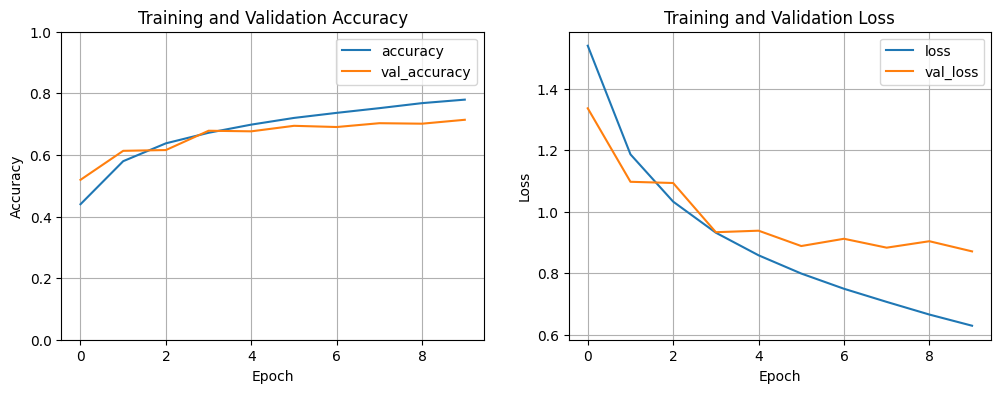

313/313 - 5s - loss: 0.8711 - accuracy: 0.7141 - 5s/epoch - 16ms/step

Test Loss: 0.8710973858833313
Test Accuracy: 0.7141000032424927


In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

In [36]:
sample_indices = np.random.choice(len(test_images), 10, replace=False)
sample_images = test_images[sample_indices]
sample_true_labels = test_labels[sample_indices]

predictions = model.predict(sample_images)

1/1 [==============================] - 0s 499ms/step


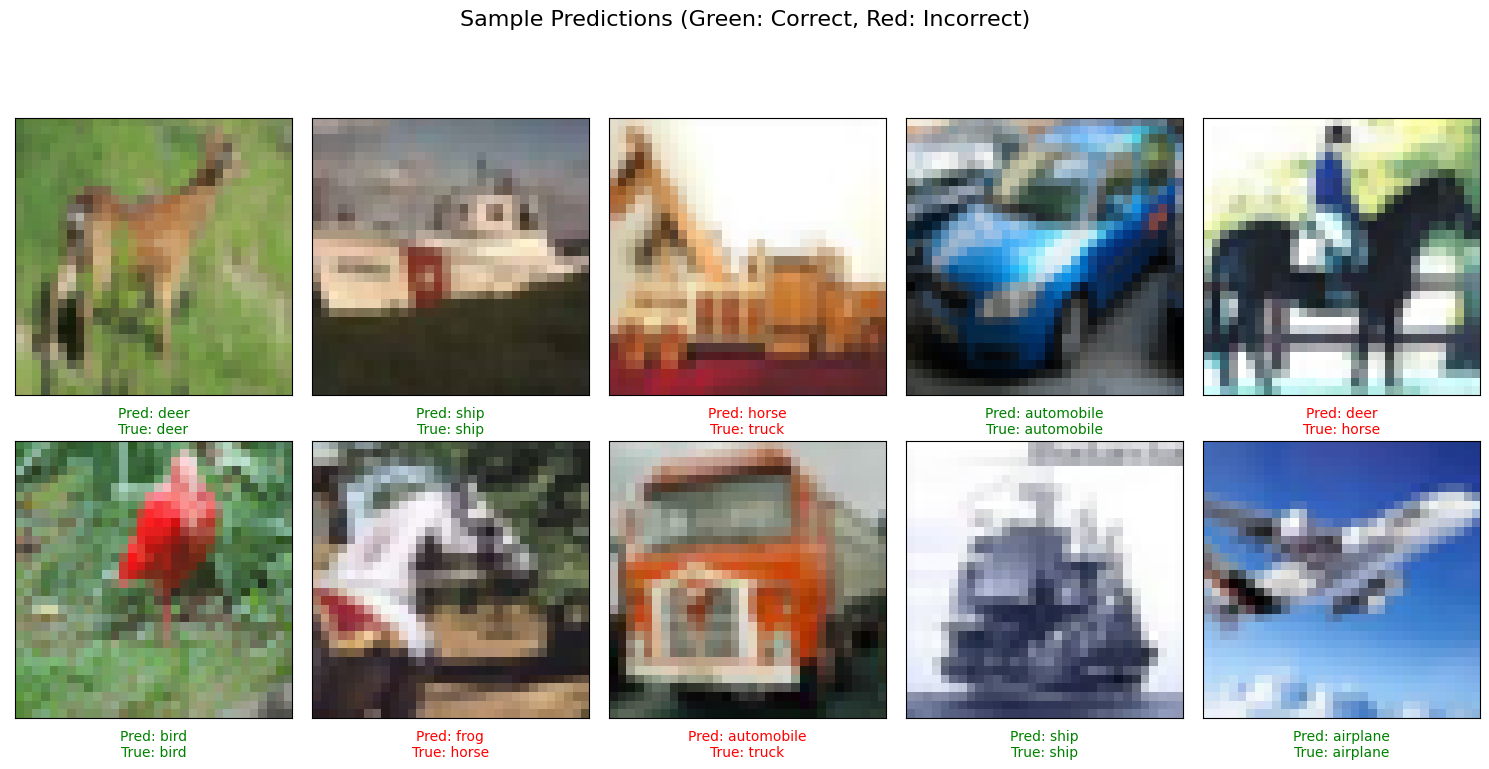

In [37]:
plt.figure(figsize=(15, 8))
for i in range(len(sample_images)):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i], cmap='gray')

    predicted_label_index = np.argmax(predictions[i])
    true_label_index = sample_true_labels[i][0]

    color = 'green' if predicted_label_index == true_label_index else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label_index]}\nTrue: {class_names[true_label_index]}", color=color)
plt.suptitle("Sample Predictions (Green: Correct, Red: Incorrect)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [38]:
model.save('exp3.h5')